# Orientation density functions

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from simmit import smartplus as sim
from simmit import identify as iden
import os

dir = os.path.dirname(os.path.realpath('__file__'))

In this Python Notebook we will show how to properly run a simulation of a composite material, providing the ODF (orientation density function) of the reinforcments.

Such identification procedure require:
1. Proper ODF peak data
1. Proper composite properties
2. A proper numerical model (here a composite model for laminate constitutive model)

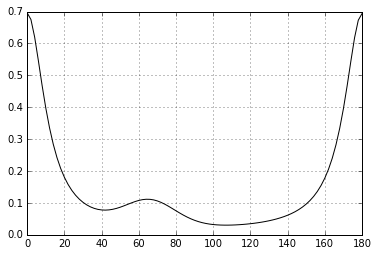

In [2]:
x = np.arange(0,182,2)
path_data = dir + '/data/'
peak_file = 'Npeaks0.dat'

y = sim.get_densities(x, path_data, peak_file, False)
fig = plt.figure()

plt.grid(True)
plt.plot(x,y, c='black')

In the previous graph we can see a multi-peak ODF (peaks are modeled using PEARSONVII functions). It actually represent quite well the microstructure of injected plates.
The next step is to discretize the ODF into phases.
The file containing the initial 2-phase microstructure contains the following informations

In [4]:
NPhases_file = dir + '/data/Nellipsoids0.dat'
NPhases = pd.read_csv(NPhases_file, delimiter=r'\s+', index_col=False, engine='python')
NPhases[::]

,Number,Coatingof,umat,save,c,psi_mat,theta_mat,phi_mat,a1,a2,a3,psi_geom,theta_geom,phi_geom,nprops,nstatev,props
0,1,0,ELISO,1,0.8,0.0,0.0,0.0,1,1,1,0.0,0.0,0.0,3,1,3000
1,0,0,ELISO,1,0.2,0.0,0.0,0.0,50,1,1,0.0,0.0,0.0,3,1,70000


In [5]:
#Number_of_parameters
n_param = 6
#Number_of_consts
n_consts = 0
#Number_of_files
nfiles = 1

#Number_of_generations
ngen =  200
#Aleatory/Mesh space population : 0=mesh 1=meshlimit 2=random 3=defined
aleaspace = 2
#Space or aleatory population : apop in case of aleatory, spop in case of mesh
apop = 200
#Number of "doped" individual
ngboys = 1
#Max population per subgeneration
maxpop = 50
#stationnarity condition
station_nb = 20

path_data = dir + '/data'
path_keys = dir + '/keys'
path_results = dir + '/results'
outputfile = 'id_params.txt'
materialfile = 'material.dat'
simul_type = 'ODF'

iden.identification(simul_type,n_param,n_consts,nfiles,ngen,aleaspace,apop,ngboys,maxpop,station_nb,path_data,path_keys,path_results,materialfile,outputfile)

In [12]:
umat_name = 'MIMTN' #This is the 5 character code for the Mori-Tanaka homogenization for composites with a matrix and ellipsoidal reinforcments
nstatev = 0

nphases = 2 #The number of phases
num_file = 0 #The num of the file that contains the subphases
int1 = 20 
int2 = 20

psi_rve = 0.
theta_rve = 0.
phi_rve = 0.

props = np.array([nphases, num_file, int1, int2, 0])

path_data = 'data'
path_results = 'results'
Nfile_init = 'Nellipsoids0.dat'
Nfile_disc = 'Nellipsoids2.dat'

nphases_rve = 36
num_phase_disc = 1

sim.ODF_discretization(nphases_rve, num_phase_disc, 0., 180., umat_name, props, path_data, peak_file, Nfile_init, Nfile_disc, 1)

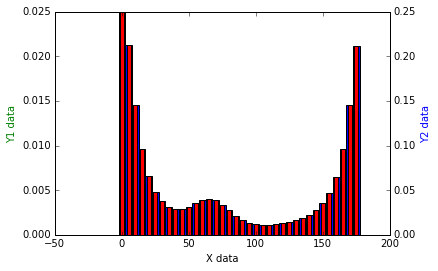

In [19]:
#Plot the concentration and the angle
NPhases_exp = dir + '/exp_data/Nellipsoids0.dat'
NPhases_iden = dir + '/' + path_data + '/' + Nfile_disc
c_exp, angle_exp = np.loadtxt(NPhases_file, usecols=(4,5), skiprows=2, unpack=True)
c_iden, angle_iden = np.loadtxt(NPhases_iden, usecols=(4,5), skiprows=2, unpack=True)

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

# the histogram of the data
xs = np.arange(0,180,5)
rects1 = ax1.bar(xs, c_exp, width=5, color='b', align='center')
rects2 = ax1.bar(xs, c_iden, width=3, color='r', align='center')

ax1.set_xlabel('X data')
ax1.set_ylabel('Y1 data', color='g')
ax2.set_ylabel('Y2 data', color='b')

ax1.set_ylim([0,0.025])
ax2.set_ylim([0,0.25])

plt.show()

#plt.grid(True)
#plt.plot(angle,c, c='black')
plt.show()